# Image Generator

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from skimage.util import random_noise

In [2]:
FP_ORIG = "jbook/figures/mammogram.png"
CMAP = 'gray'

In [3]:
def convert_uint8(img: np.ndarray) -> np.ndarray:
    """Converts floating point array in [0,1] to unit8 in [9,255]"""
    return np.array(255*img, dtype='uint8')

## Gaussian Noise

In [20]:
orig = cv2.imread(FP_ORIG)
gaussian_1 = random_noise(orig, mode='gaussian', mean=0,var=0.01)
gaussian_2 = random_noise(orig, mode='gaussian', mean=0,var=0.1)
gaussian_3 = random_noise(orig, mode='gaussian', mean=0,var=1)

gaussian_1 = convert_uint8(gaussian_1)
gaussian_2 = convert_uint8(gaussian_2)
gaussian_3 = convert_uint8(gaussian_3)

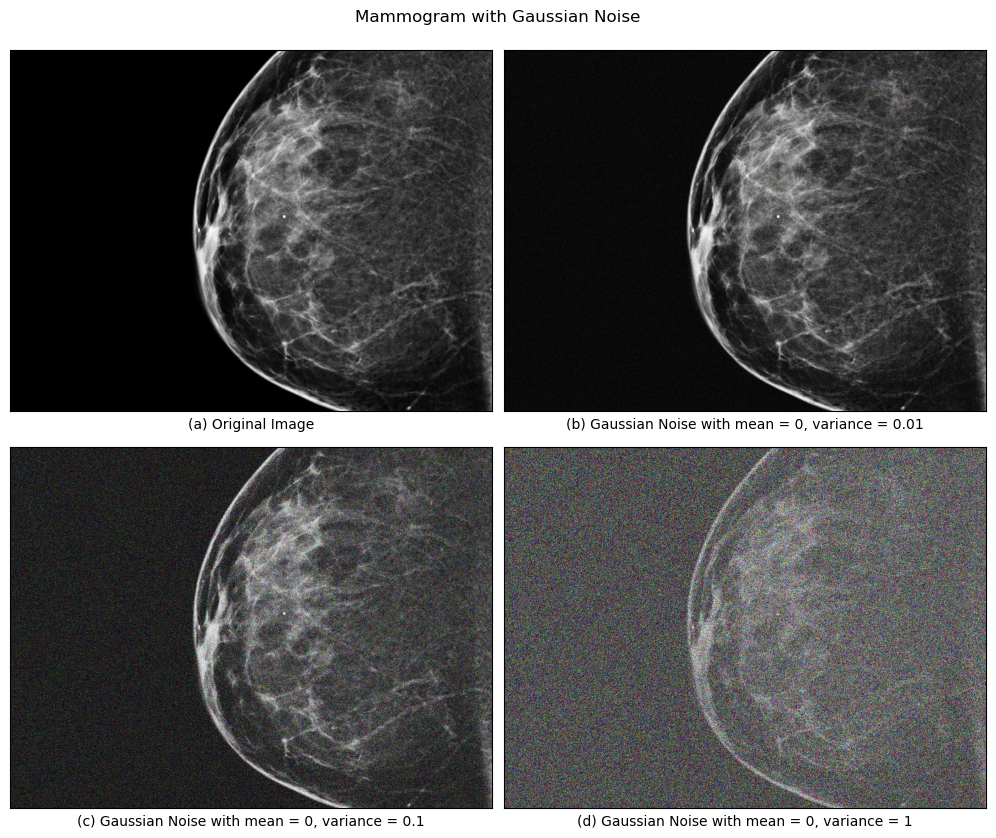

In [22]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(10,8.5))
for ax in axes.flat:
    _ = ax.set(xticks=[], yticks=[])

_ = axes[0,0].imshow(orig, cmap=CMAP)
_ = axes[0,0].set_xlabel('(a) Original Image', fontsize=10)

_ = axes[0,1].imshow(gaussian_1, cmap=CMAP)
_ = axes[0,1].set_xlabel(f'(b) Gaussian Noise with mean = 0, variance = {0.01}', fontsize=10)

_ = axes[1,0].imshow(gaussian_2, cmap=CMAP)
_ = axes[1,0].set_xlabel(f'(c) Gaussian Noise with mean = 0, variance = {0.1}', fontsize=10)

_ = axes[1,1].imshow(gaussian_3, cmap=CMAP)
_ = axes[1,1].set_xlabel(f'(d) Gaussian Noise with mean = 0, variance = {1}', fontsize=10)

_ = plt.suptitle("Mammogram with Gaussian Noise", fontsize=12)
plt.tight_layout()
fig.savefig("/home/john/projects/bcd/jbook/figures/mammogram_gaussian.png", transparent=False)
plt.show()

## Quantization Noise

In [6]:
orig = Image.open(FP_ORIG)
quant = orig.quantize(colors=2)

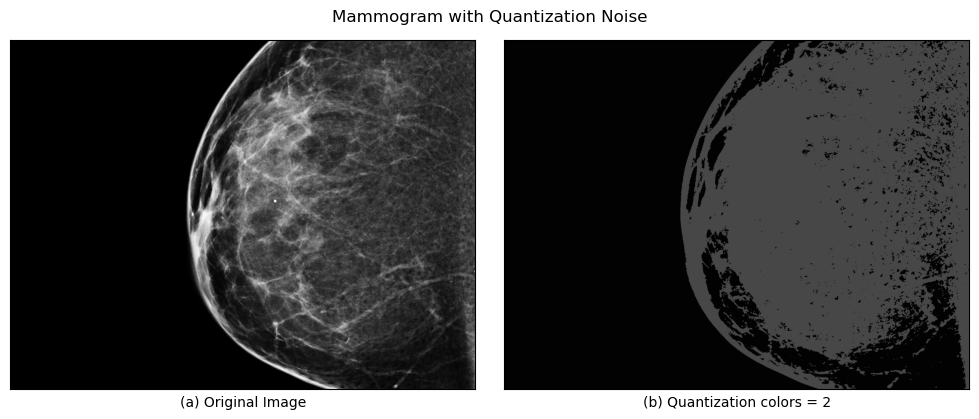

In [7]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(10,4))
for ax in axes.flat:
    _ = ax.set(xticks=[], yticks=[])

_ = axes[0].imshow(orig, cmap=CMAP)
_ = axes[0].set_xlabel('(a) Original Image', fontsize=10)

_ = axes[1].imshow(quant, cmap=CMAP)
_ = axes[1].set_xlabel('(b) Quantization colors = 2', fontsize=10)

_ = plt.suptitle("Mammogram with Quantization Noise", fontsize=12)
plt.tight_layout()
plt.show()
fig.savefig("/home/john/projects/bcd/jbook/figures/mammogram_quantize.png", transparent=False)


## Speckle Noise

In [8]:
orig = cv2.imread(FP_ORIG)
speckle_1 = random_noise(orig, mode='speckle', mean=2,var=0.1)
speckle_2 = random_noise(orig, mode='speckle', mean=4,var=0.25)
speckle_3 = random_noise(orig, mode='speckle', mean=8,var=0.5)

speckle_1 = convert_uint8(speckle_1)
speckle_2 = convert_uint8(speckle_2)
speckle_3 = convert_uint8(speckle_3)

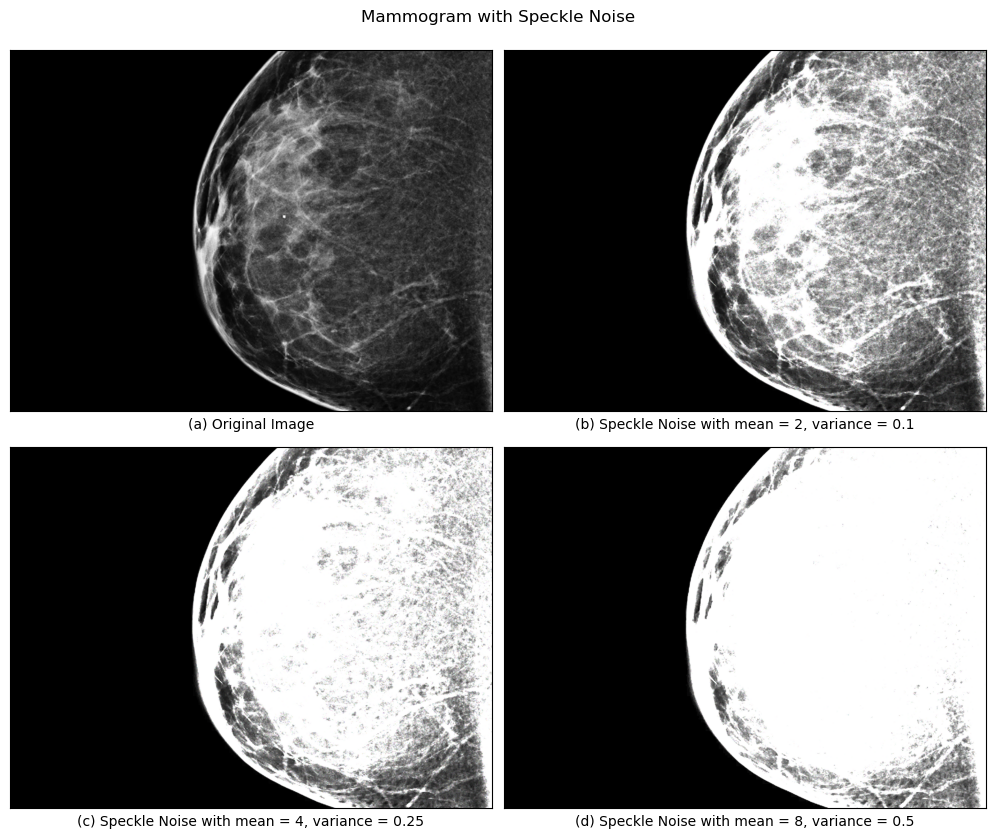

In [9]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(10,8.5))
for ax in axes.flat:
    _ = ax.set(xticks=[], yticks=[])

_ = axes[0,0].imshow(orig, cmap=CMAP)
_ = axes[0,0].set_xlabel('(a) Original Image', fontsize=10)

_ = axes[0,1].imshow(speckle_1, cmap=CMAP)
_ = axes[0,1].set_xlabel(f'(b) Speckle Noise with mean = 2, variance = {0.1}', fontsize=10)

_ = axes[1,0].imshow(speckle_2, cmap=CMAP)
_ = axes[1,0].set_xlabel(f'(c) Speckle Noise with mean = 4, variance = {0.25}', fontsize=10)

_ = axes[1,1].imshow(speckle_3, cmap=CMAP)
_ = axes[1,1].set_xlabel(f'(d) Speckle Noise with mean = 8, variance = {0.5}', fontsize=10)

_ = plt.suptitle("Mammogram with Speckle Noise", fontsize=12)
plt.tight_layout()
plt.show()
fig.savefig("/home/john/projects/bcd/jbook/figures/mammogram_speckle.png", transparent=False)

## Salt & Pepper Noise

In [25]:
orig = cv2.imread(FP_ORIG)
snp_1 = random_noise(orig, mode='s&p', amount=0.1)
snp_1 = convert_uint8(snp_1)

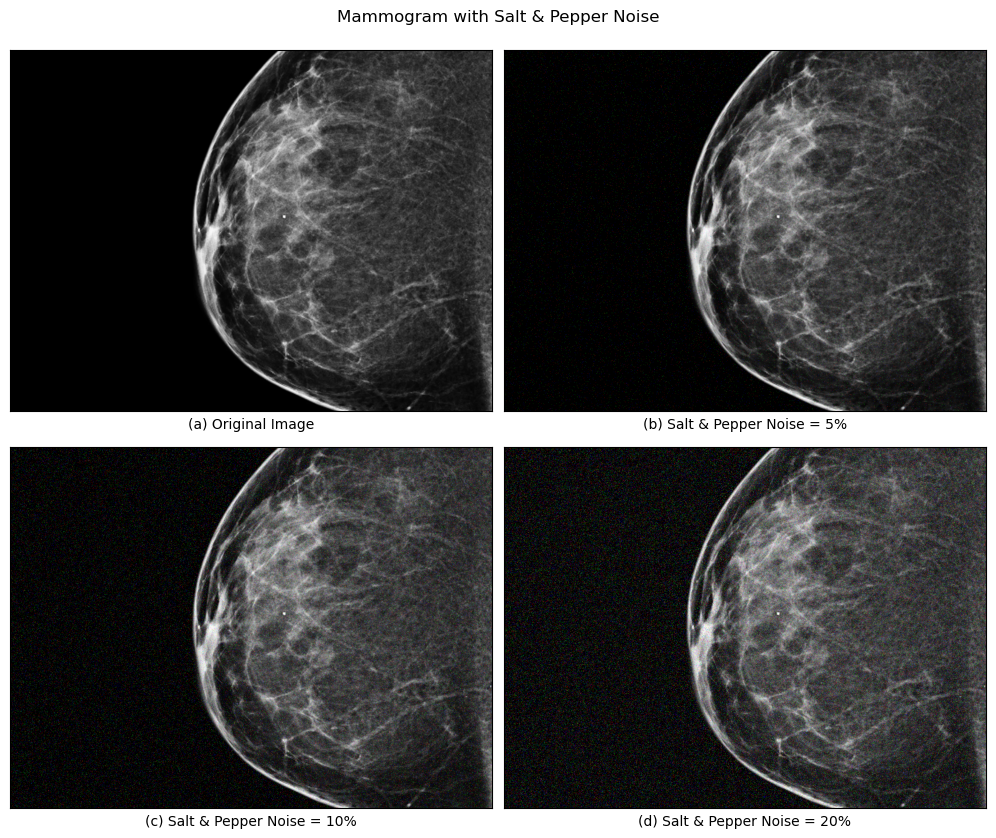

In [26]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(10,4))
for ax in axes.flat:
    _ = ax.set(xticks=[], yticks=[])

_ = axes[0].imshow(orig, cmap=CMAP)
_ = axes[0].set_xlabel('(a) Original Image', fontsize=10)

_ = axes[1].imshow(snp_1, cmap=CMAP)
_ = axes[1].set_xlabel('(b) Salt & Pepper Noise = 10%', fontsize=10)


_ = plt.suptitle("Mammogram with Salt & Pepper Noise", fontsize=12)
plt.tight_layout()
plt.show()
fig.savefig("/home/john/projects/bcd/jbook/figures/mammogram_snp.png", transparent=False)

## Poisson Noise

In [12]:
orig = cv2.imread(FP_ORIG)
poisson = random_noise(orig, mode='poisson')
poisson = convert_uint8(poisson)

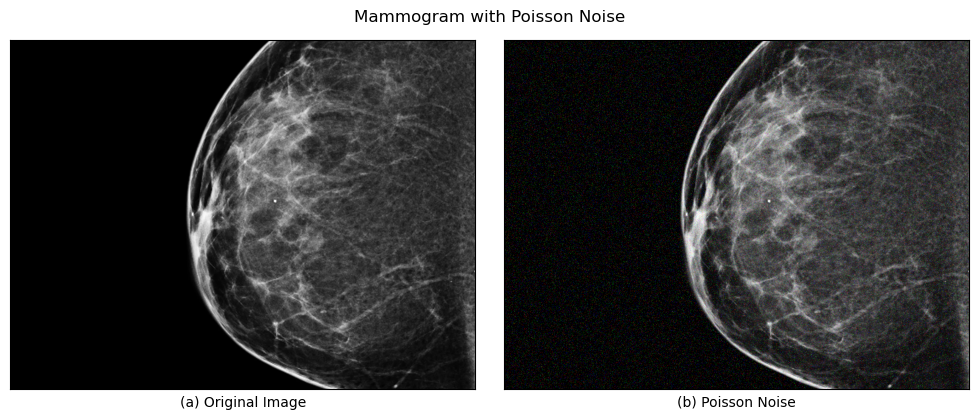

In [13]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(10,4))
for ax in axes.flat:
    _ = ax.set(xticks=[], yticks=[])

_ = axes[0].imshow(orig, cmap=CMAP)
_ = axes[0].set_xlabel('(a) Original Image', fontsize=10)

_ = axes[1].imshow(snp_1, cmap=CMAP)
_ = axes[1].set_xlabel('(b) Poisson Noise', fontsize=10)

_ = plt.suptitle("Mammogram with Poisson Noise", fontsize=12)
plt.tight_layout()
plt.show()
fig.savefig("/home/john/projects/bcd/jbook/figures/mammogram_poisson.png", transparent=False)

${f(x,y)} = \begin{cases}
    s(x,y)\text{ with probability 1-P} \\
    n(x,y) \text{ with probability P}
\end{cases}$

$\triangle$